# 차원 축소

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df.head()

In [ ]:
iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target', colormap='viridis' )

## PCA를 활용한 차원 축소

<AxesSubplot:xlabel='0', ylabel='1'>

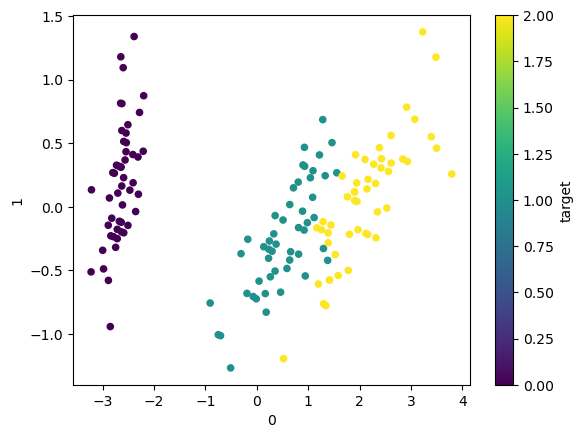

In [6]:
pca = PCA(n_components=2)
x = pca.fit_transform(iris['data'])
x = pd.DataFrame(x)
x['target'] = iris['target']
x.plot.scatter(x=0, y=1, c='target', colormap='viridis' )